In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [3]:
import os
print(os.listdir(("/content/drive/My Drive/")))

['splnproc1703_mac.docm', 'Classroom', 'CSE3223_170104142_PartA_SectionC.pdf', 'CSE3213_170104142_PartA_SectionC.pdf', 'CSE3215_170104142_PartA_SectionC.pdf', '170104142 (5).pdf', 'CSE3213_170104142_PartA.pdf', 'CSE3213_170104142_partB.pdf', 'CSE3211_170104142_PartA .pdf', 'CSE3211_170104142_partB.pdf', 'HUM3207_170104142_partA.pdf', 'HUM3207_170104142_partB.pdf', 'CSE3223_170104142_partA.pdf', 'CSE3223_170104142_partB.pdf', 'CSE3215_170104142_partA.pdf', 'CSE3215_170104142_partB (1).pdf', 'CSE3215_170104142_partB.pdf', 'thesis', 'compiler lab return', '170104142_Assignment1 (1).pdf', '170104142_Assignment1.c', 'input1.c', 'DDS', 'C2_170104142 (1).pdf', '170104142 (4).pdf', 'C2_170104142.pdf', '170104142_on1 (1).c', '170104142_on1.c', 'MSD_proposal3.2.pptx', ' Introduction to IPv4 and Ipv6 Address.gslides', '170104142_quiz1.pdf', 'QUIZ - 01 SET - C_170104142.gdoc', '41', 'C2_170104142_assignment2.docx', '170104142_Assignment-2.pdf', '170104142_Assignment2.pdf', '170104142_Assignment2.c

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/My Drive/"

dataset_A = path + 'Dataset A.zip'
with ZipFile(dataset_A, 'r') as zip:
  zip.extractall()

In [5]:
PATH = '/content/'
data_labels = pd.read_csv(PATH + 'training-a.csv', usecols = ['filename', 'digit'])
print(data_labels.shape)
data_labels.head()

(19702, 2)


,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0


In [9]:
TRAIN_PATH = "/content/drive/My Drive/Train"
os.mkdir(TRAIN_PATH)

def processImages(folder_name):
  src = "/content/" + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH) 

processImages('training-a')

In [10]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [11]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)



In [12]:
batch_size = 20
num_iters = 20000
input_dim = 28*28 
num_hidden = 6 
output_dim = 10

learning_rate = 0.01  

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

20


In [13]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:789
Test dataloader:197


In [14]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas


In [15]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=6, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=6, out_features=6, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=6, out_features=6, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=6, out_features=6, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=6, out_features=6, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=6, out_features=6, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=6, out_features=10, bias=True)
)

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)

In [17]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 500. Loss: 2.2783889770507812. Accuracy: 12.766497461928934
Epoch:  2
Iteration: 1000. Loss: 1.8843119144439697. Accuracy: 20.736040609137056
Iteration: 1500. Loss: 1.9845596551895142. Accuracy: 27.131979695431472
Epoch:  3
Iteration: 2000. Loss: 1.6963443756103516. Accuracy: 23.781725888324875
Epoch:  4
Iteration: 2500. Loss: 1.7430469989776611. Accuracy: 21.700507614213198
Iteration: 3000. Loss: 1.9905742406845093. Accuracy: 31.472081218274113
Epoch:  5
Iteration: 3500. Loss: 1.6837965250015259. Accuracy: 29.314720812182742
Epoch:  6
Iteration: 4000. Loss: 1.7424862384796143. Accuracy: 27.436548223350254
Iteration: 4500. Loss: 1.6732648611068726. Accuracy: 26.548223350253807
Epoch:  7
Iteration: 5000. Loss: 1.7120311260223389. Accuracy: 25.0
Iteration: 5500. Loss: 1.8996679782867432. Accuracy: 29.13705583756345
Epoch:  8
Iteration: 6000. Loss: 1.68674635887146. Accuracy: 30.634517766497463
Epoch:  9
Iteration: 6500. Loss: 1.4879252910614014. Accuracy: 22.96954314

In [18]:
#settings 1
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), path + 'assignment2_model.pkl') 

[2.2783889770507812, 1.8843119144439697, 1.9845596551895142, 1.6963443756103516, 1.7430469989776611, 1.9905742406845093, 1.6837965250015259, 1.7424862384796143, 1.6732648611068726, 1.7120311260223389, 1.8996679782867432, 1.68674635887146, 1.4879252910614014, 1.8196386098861694, 1.677420973777771, 1.5010112524032593, 1.8105741739273071, 1.5952228307724, 1.4206303358078003, 1.779039740562439, 1.9145634174346924, 1.6691725254058838, 1.7364673614501953, 1.9176603555679321, 1.8001724481582642, 1.3197499513626099, 1.9119819402694702, 1.7179243564605713, 1.7395398616790771, 1.7587391138076782, 1.4321393966674805]


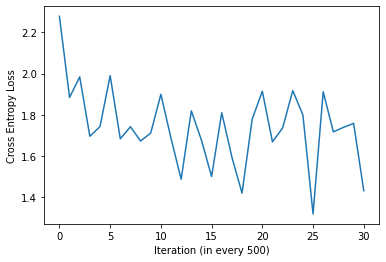

In [19]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [20]:
print("Final Model Loss: ",iteration_loss[-1])
print ("Final Model Accuracy: ",accuracy)

Final Model Loss:  1.4321393966674805
Final Model Accuracy:  31.446700507614214


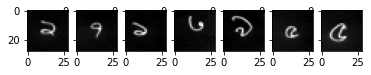

In [21]:
import matplotlib
import matplotlib.pyplot as plt
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 7)
for i in range(7):
    ax[i].imshow(images[i].view(28,28), cmap=matplotlib.cm.binary)

plt.show()